Coupling of mean and variance estimate

$$
\frac{d}{d\tau}\big[\begin{array}{c}
w\\
b
\end{array}\big]=-2\eta\bigg(\big[\begin{array}{cc}
\mu^{2}+\sigma^{2}+\lambda\  & \ \mu\\
\mu\  & \ 1
\end{array}\big]\ \big[\begin{array}{c}
w\\
b
\end{array}\big]-\big[\begin{array}{c}
\lambda+\mu^{2}\\
\mu
\end{array}\big]\bigg)

$$

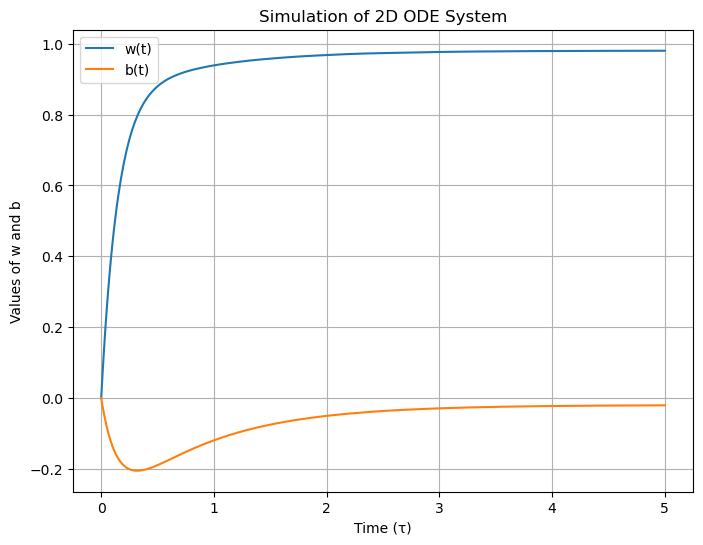

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters
mu = -1.0  # example value for mu
sigma = 0.2  # example value for sigma
lambda_ = 2.0  # example value for lambda
eta = 1.0  # example value for eta

# Define the ODE system
def ode_system(t, y):
    w, b = y
    A = np.array([[mu**2 + sigma**2 + lambda_, mu],
                  [mu, 1]])
    B = np.array([lambda_ + mu**2, mu])
    dydt = -2 * eta * (A @ np.array([w, b]) - B)
    return dydt

# Initial conditions
y0 = [0, 0]  # starting values for w and b

# Time span for the simulation
t_span = [0, 5]
t_eval = np.linspace(t_span[0], t_span[1], 400)

# Solve the ODE system
sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], label='w(t)')
plt.plot(sol.t, sol.y[1], label='b(t)')
plt.xlabel('Time (τ)')
plt.ylabel('Values of w and b')
plt.title('Simulation of 2D ODE System')
plt.legend()
plt.grid(True)
plt.show()

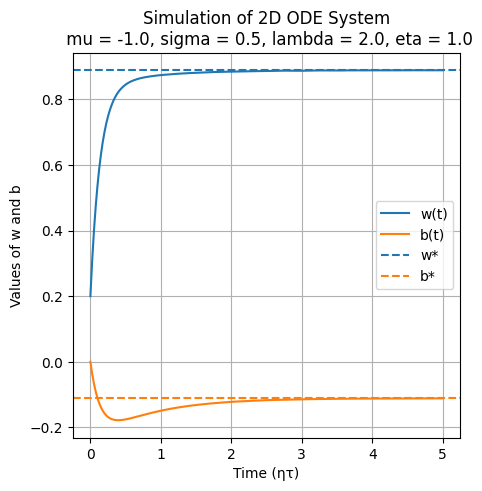

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

def simulate_ode(mu, sigma, lambda_, eta, y0, t_span=(0, 5), pnts=400, logscale=False, figsize=(5, 5)):
    # Define the ODE system
    def ode_system(t, y):
        w, b = y
        A = np.array([[mu**2 + sigma**2 + lambda_, mu],
                      [mu, 1]])
        B = np.array([lambda_ + mu**2, mu])
        dydt = -2 * eta * (A @ np.array([w, b]) - B)
        return dydt
    t_eval = np.linspace(t_span[0], t_span[1], pnts)
    # Solve the ODE system
    sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)
    w_star = lambda_ / (lambda_ + sigma**2)
    b_star = (1 - w_star) * mu
    # Plot the results
    fig = plt.figure(figsize=figsize)
    plt.plot(sol.t, sol.y[0], label='w(t)')
    plt.plot(sol.t, sol.y[1], label='b(t)')
    plt.axhline(y=w_star, color='C0', linestyle='--', label='w*')
    plt.axhline(y=b_star, color='C1', linestyle='--', label='b*')
    if logscale:
        plt.xscale('log')
    plt.xlabel('Time (ητ)')
    plt.ylabel('Values of w and b')
    plt.title('Simulation of 2D ODE System\n mu = {}, sigma = {}, lambda = {}, eta = {}'.format(mu, sigma, lambda_, eta))
    plt.legend()
    plt.grid(True)
    plt.show()
    return fig, sol

# Example usage
mu = -1.0
sigma = 0.2
lambda_ = 2.0
eta = 1.0
y0 = [1, 0]
t_span = [0, 5]

simulate_ode(mu = -1.0, sigma = 0.5, lambda_ = 2.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5]);

In [4]:
import os
from os.path import join
from circuit_toolkit.plot_utils import saveallforms
figdir = r"/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/Manuscript_DiffusionLearningCurve/Figures/Figure_mean_cov_interaction"

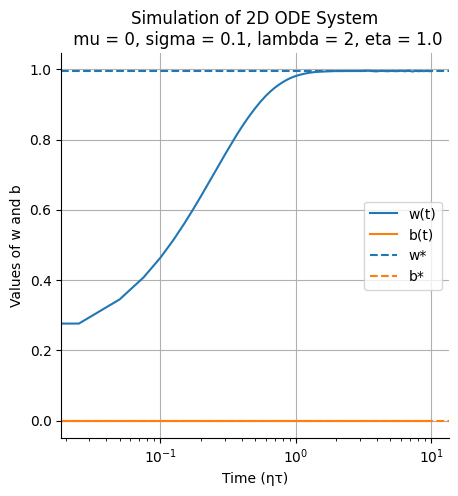

In [11]:
fig, sol = simulate_ode(mu = 0, sigma = 0.1, lambda_ = 2, eta = 1.0, y0 = [0.2, 0], t_span = [0, 10], logscale=True)
# saveallforms(figdir, f"mean_cov_interaction_lambda{lambda_}_sigma{sigma}", fig)

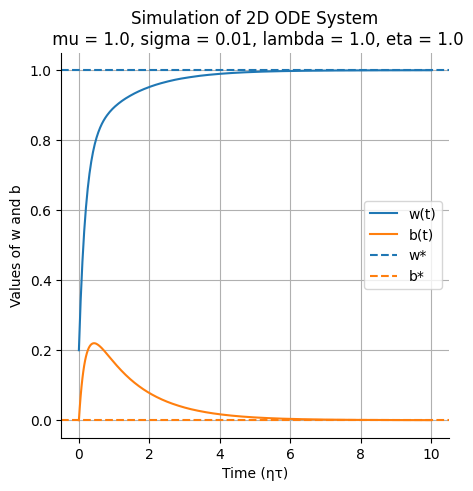

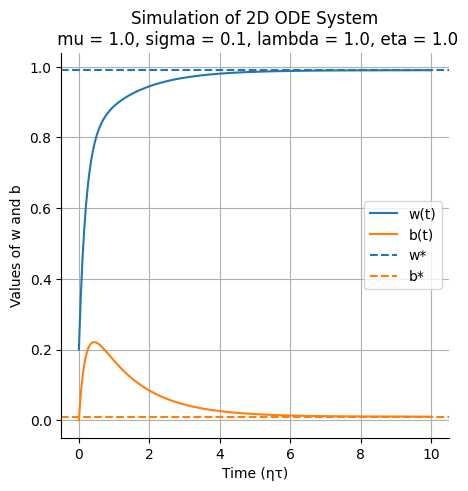

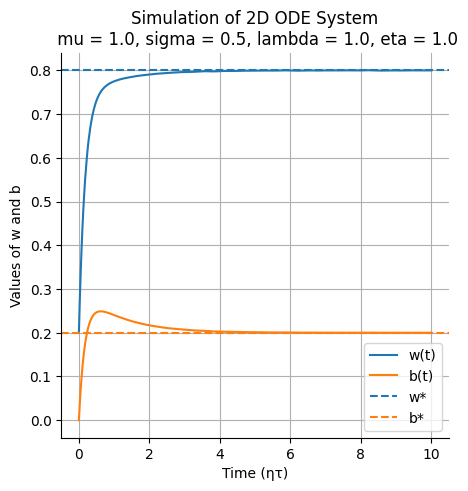

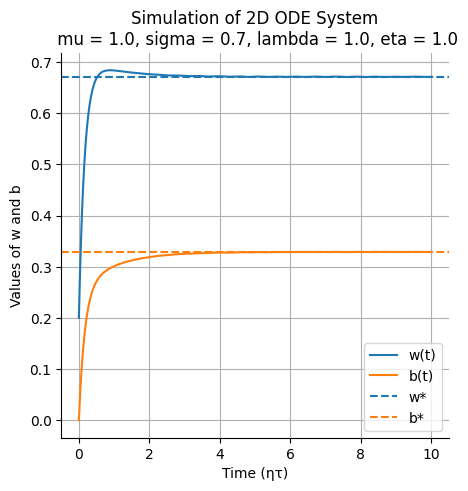

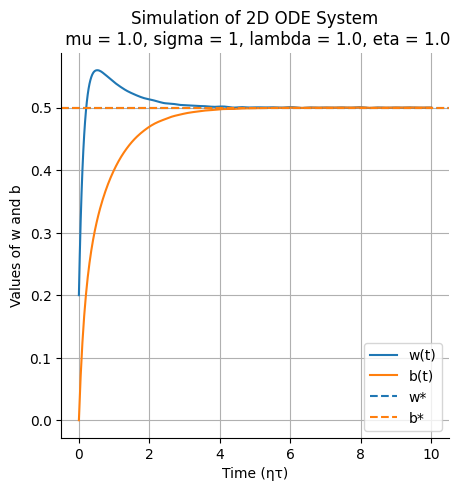

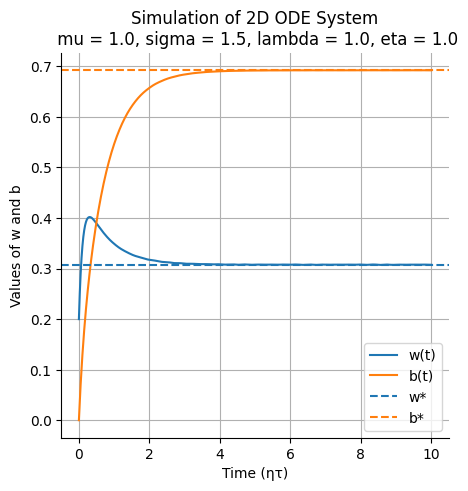

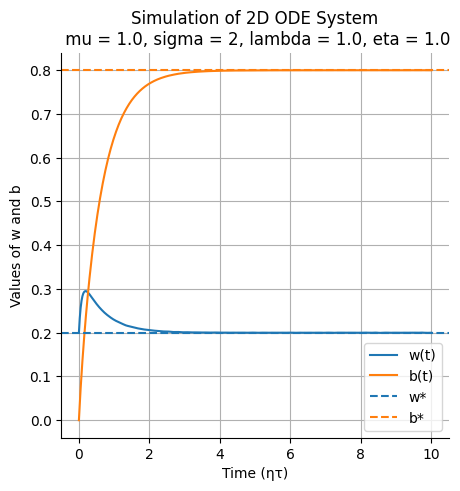

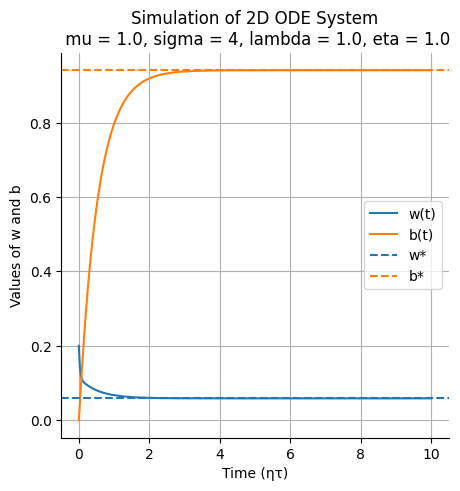

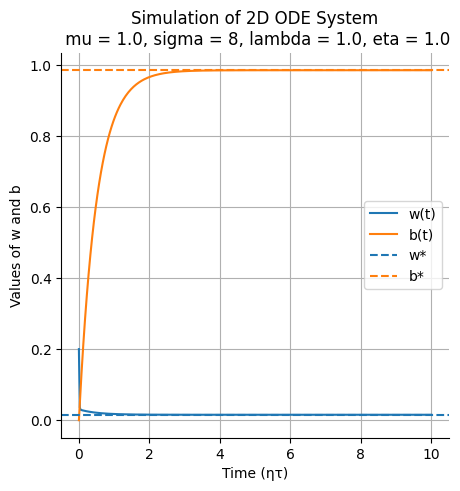

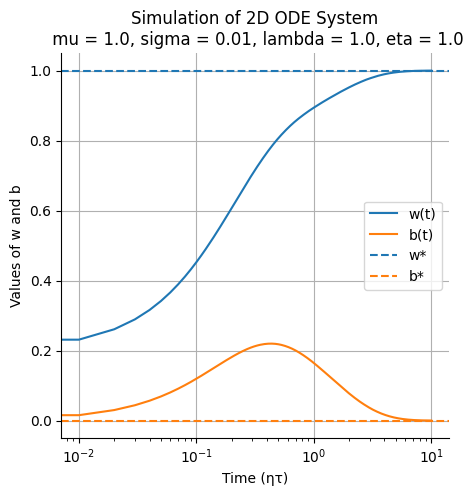

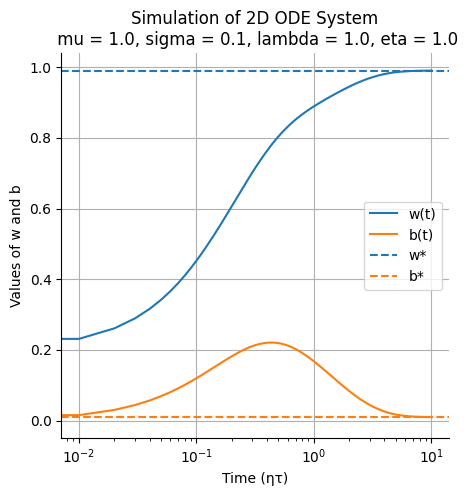

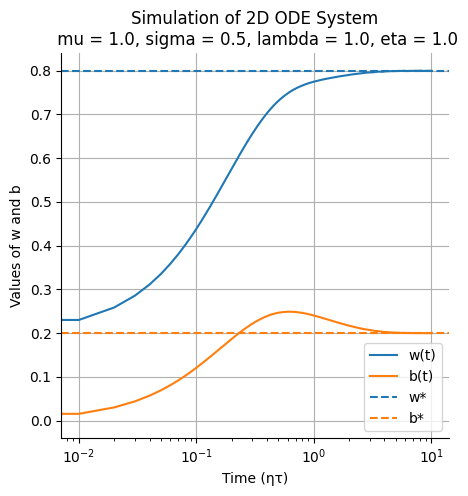

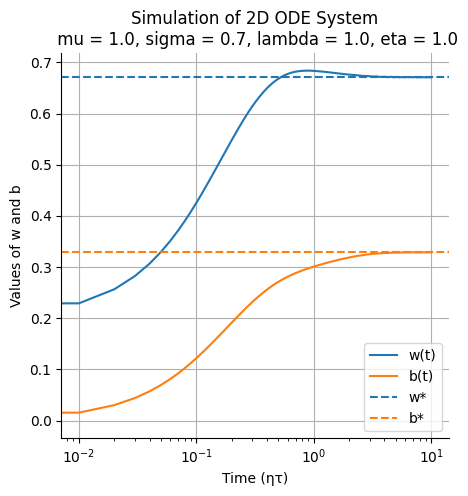

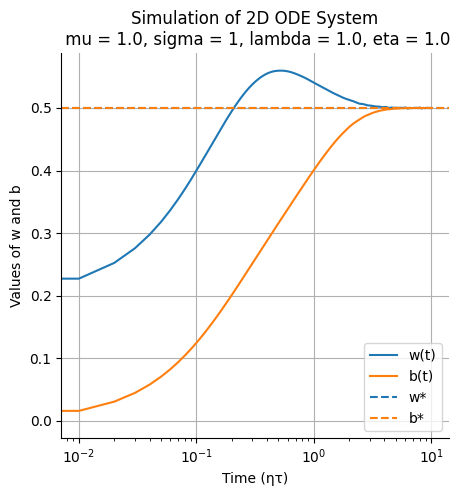

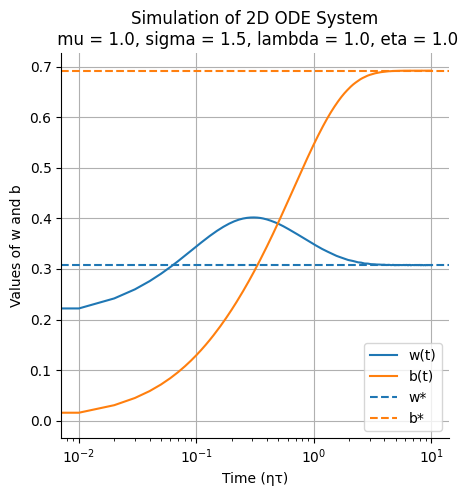

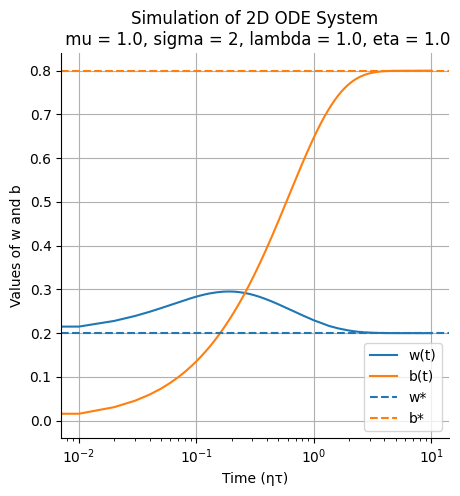

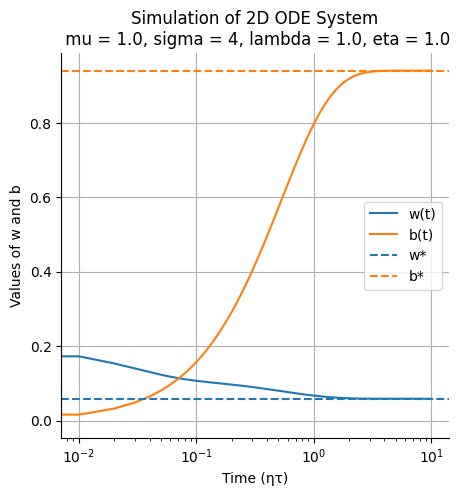

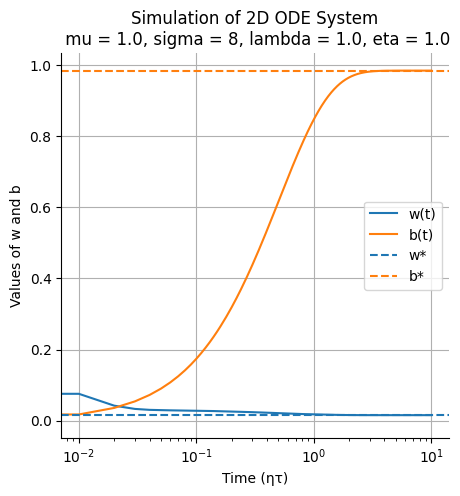

In [8]:
lambda_ = 1.0
for sigma in [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 4, 8]:
    fig, sol = simulate_ode(mu = 1.0, sigma = sigma, lambda_ = lambda_, eta = 1.0, y0 = [0.2, 0], t_span = [0, 10], logscale=False)
    saveallforms(figdir, f"mean_cov_interaction_lambda{lambda_}_sigma{sigma}", fig)
for sigma in [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 4, 8]:
    fig, sol = simulate_ode(mu = 1.0, sigma = sigma, lambda_ = lambda_, eta = 1.0, y0= [0.2, 0], t_span= [0, 10], logscale=True, pnts=1000)
    saveallforms(figdir, f"mean_cov_interaction_lambda{lambda_}_sigma{sigma}_logx", fig)

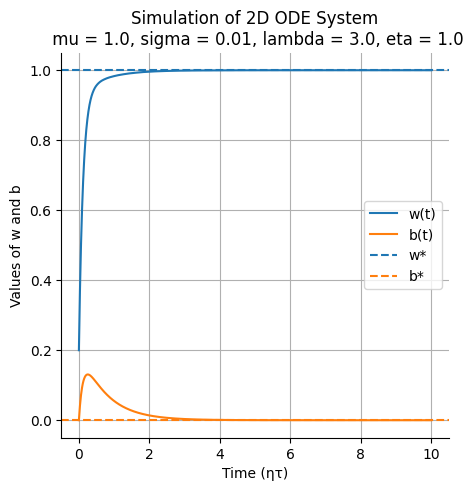

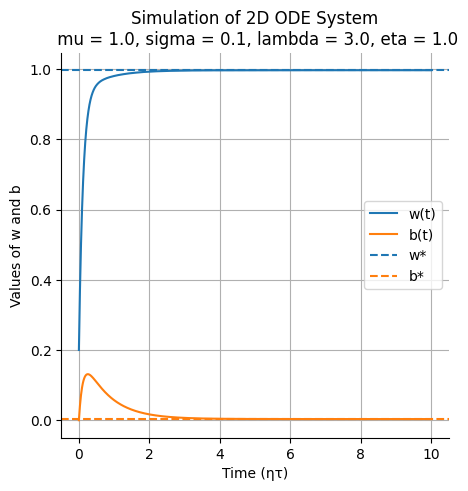

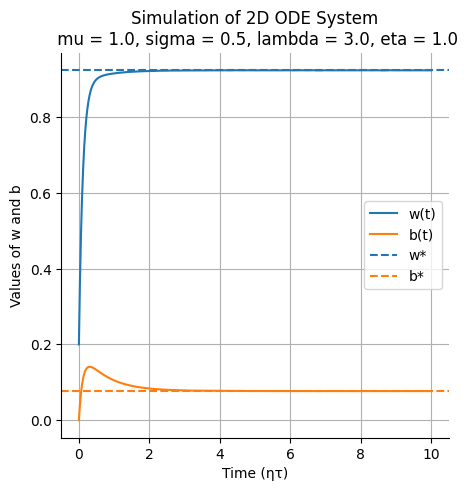

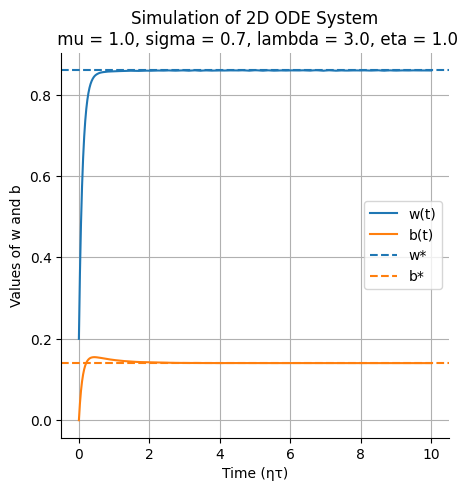

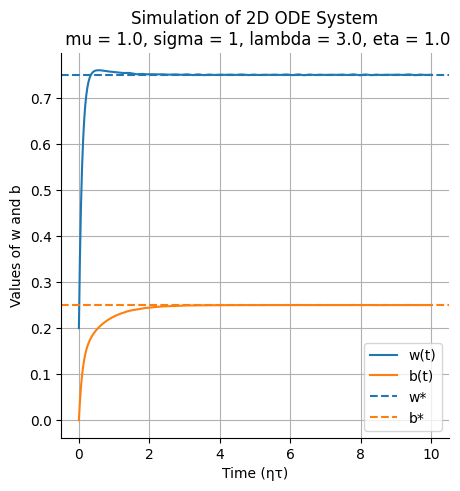

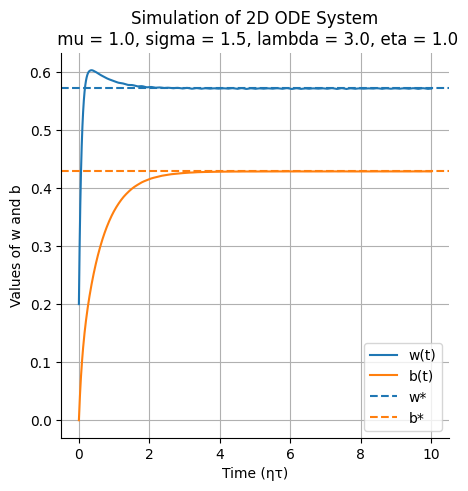

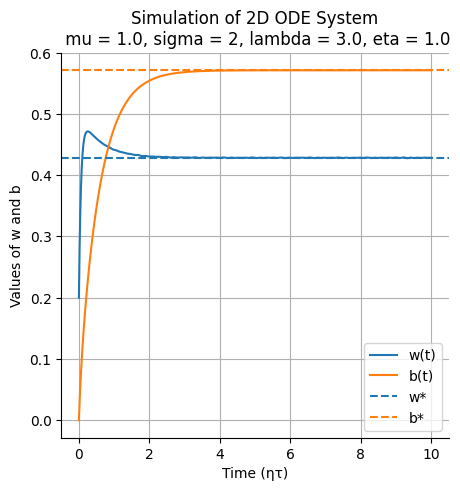

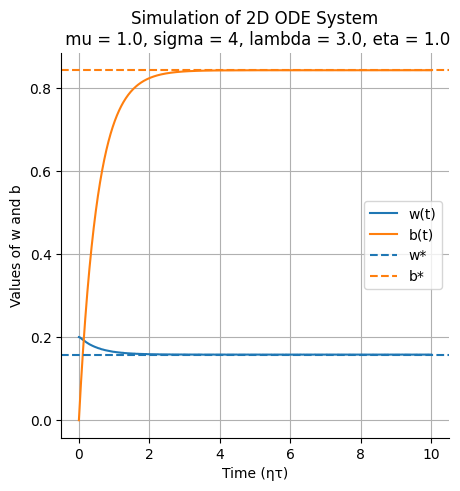

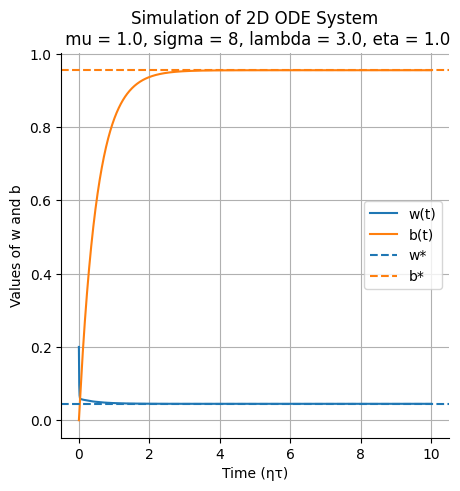

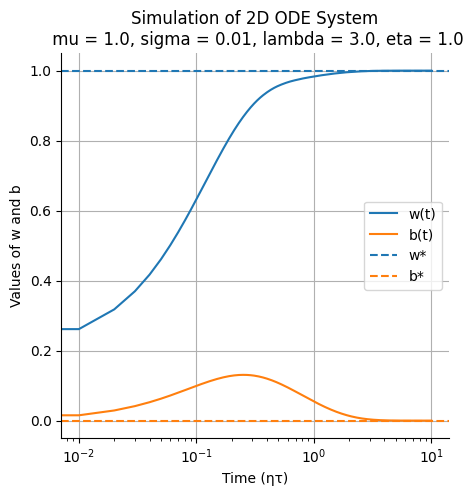

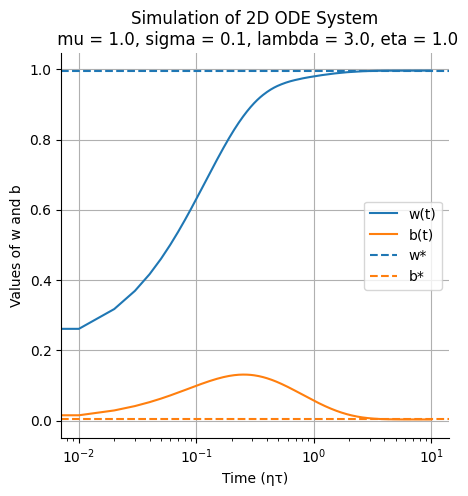

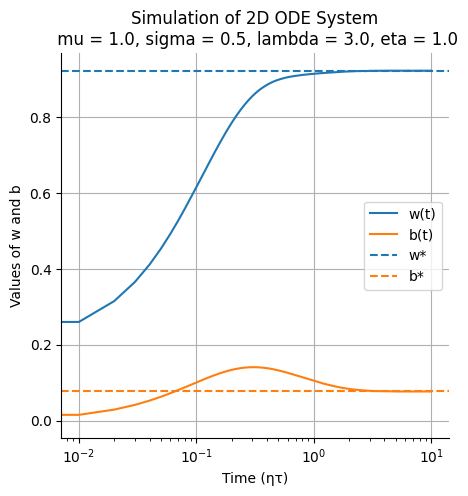

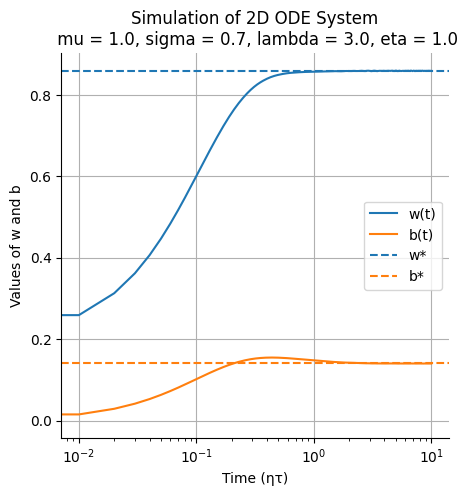

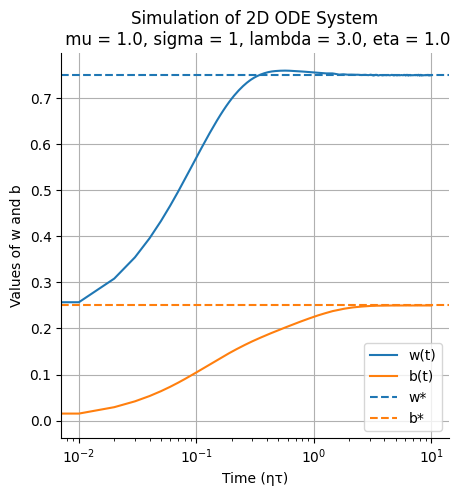

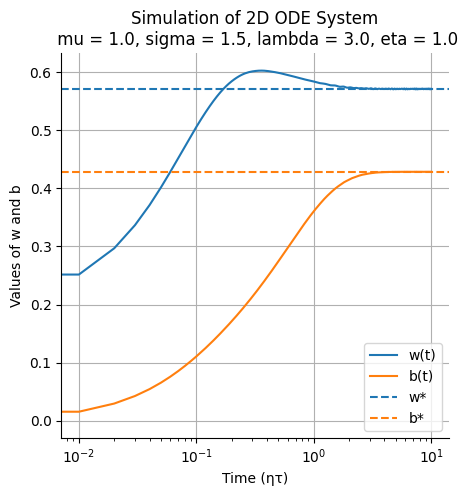

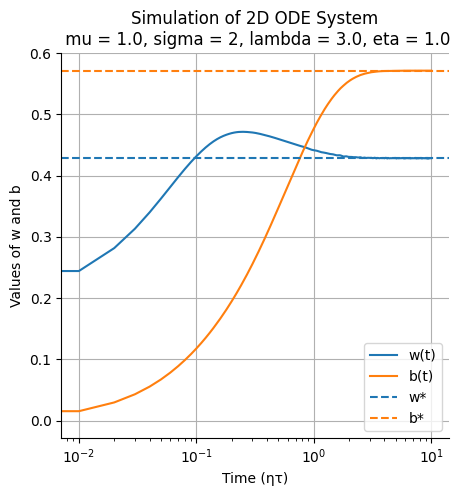

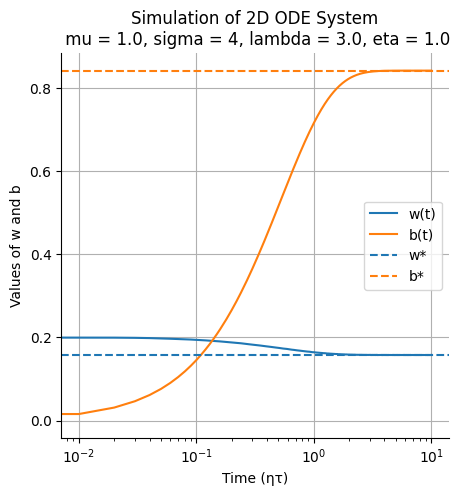

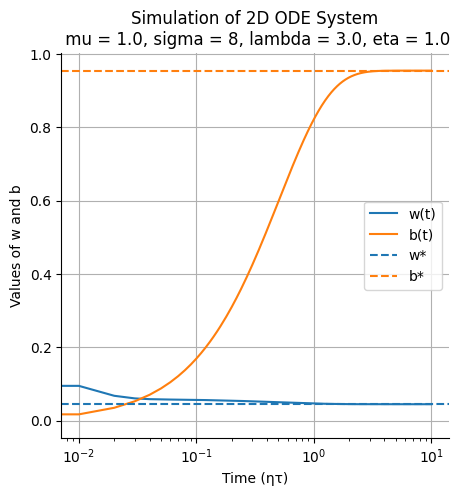

In [7]:
lambda_ = 3.0
for sigma in [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 4, 8]:
    fig, sol = simulate_ode(mu = 1.0, sigma = sigma, lambda_ = lambda_, eta = 1.0, y0= [0.2, 0], t_span= [0, 10], logscale=False, pnts=1000)
    saveallforms(figdir, f"mean_cov_interaction_lambda{lambda_}_sigma{sigma}", fig)
for sigma in [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 4, 8]:
    fig, sol = simulate_ode(mu = 1.0, sigma = sigma, lambda_ = lambda_, eta = 1.0, y0= [0.2, 0], t_span= [0, 10], logscale=True, pnts=1000)
    saveallforms(figdir, f"mean_cov_interaction_lambda{lambda_}_sigma{sigma}_logx", fig)

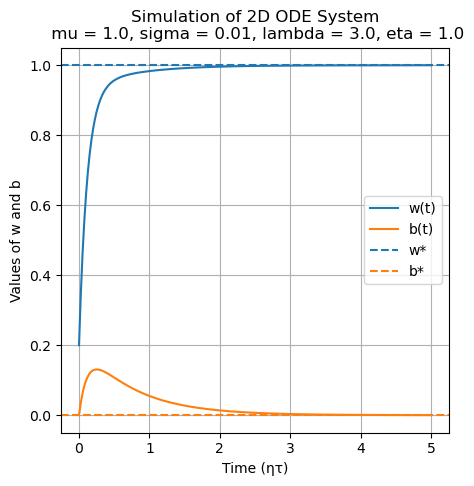

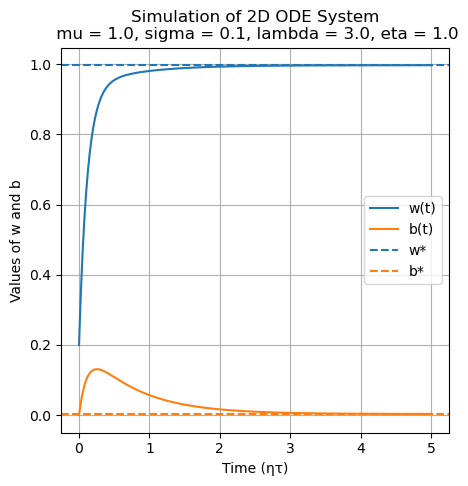

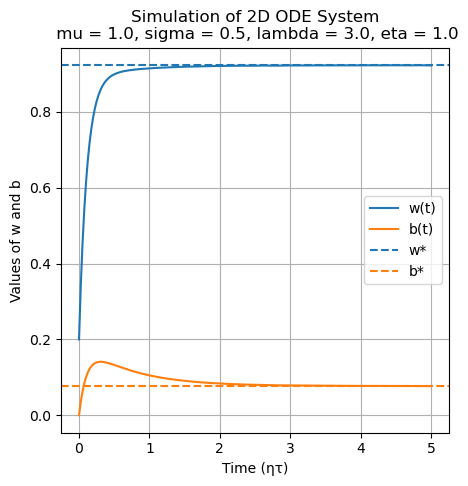

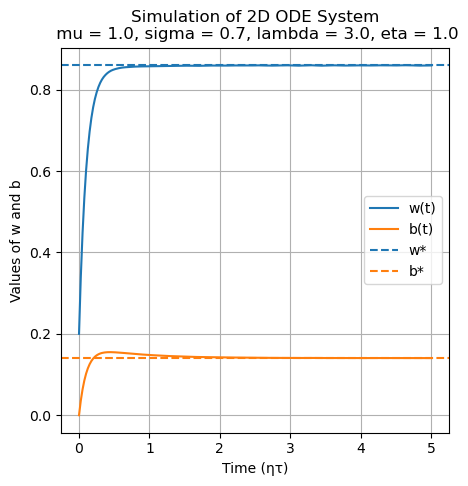

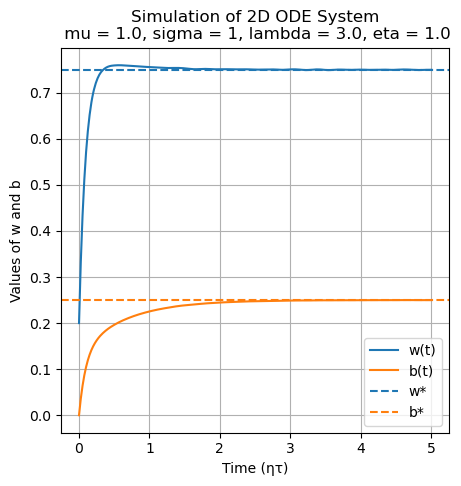

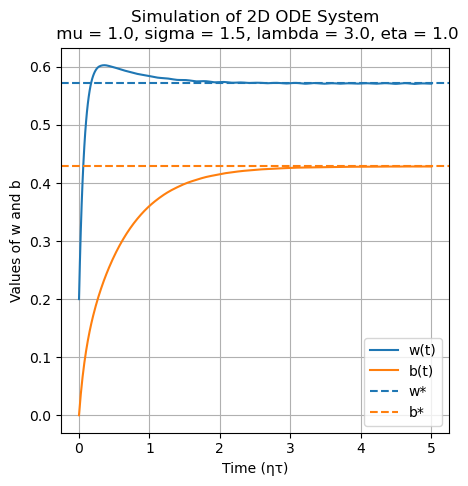

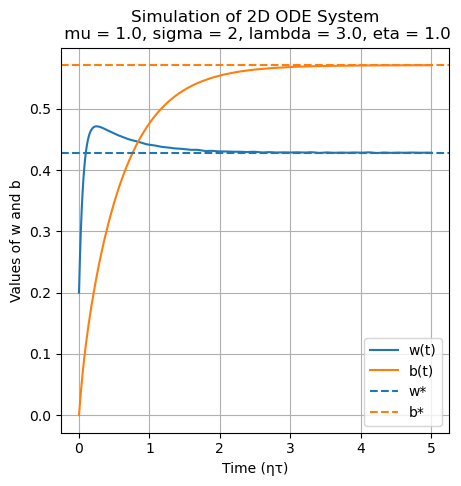

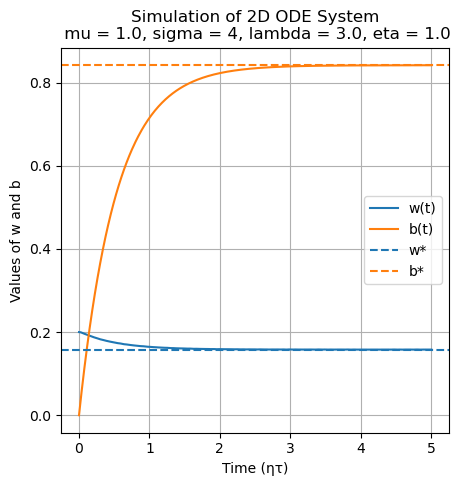

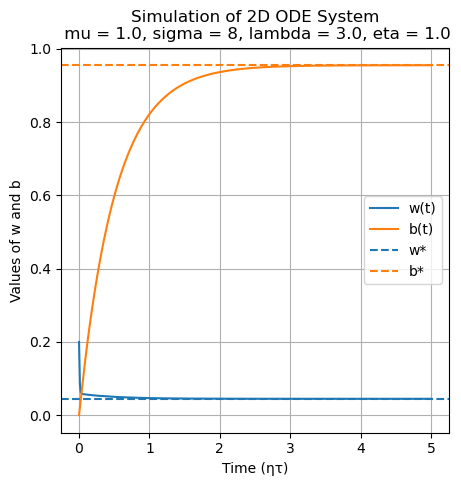

In [4]:
simulate_ode(mu = 1.0, sigma = 0.01, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.1, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.5, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.7, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 1, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 1.5, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 2, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 4, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 8, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])

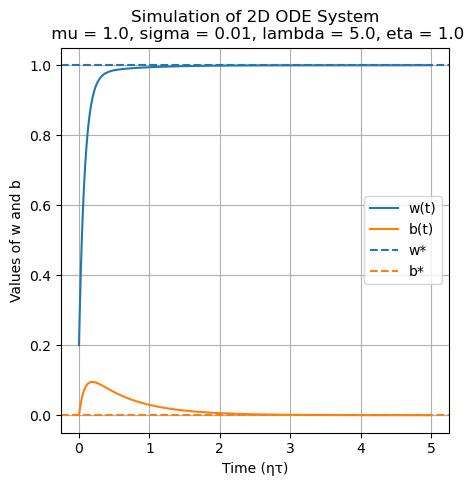

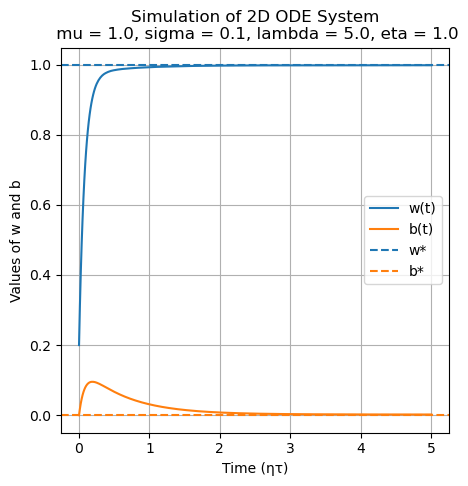

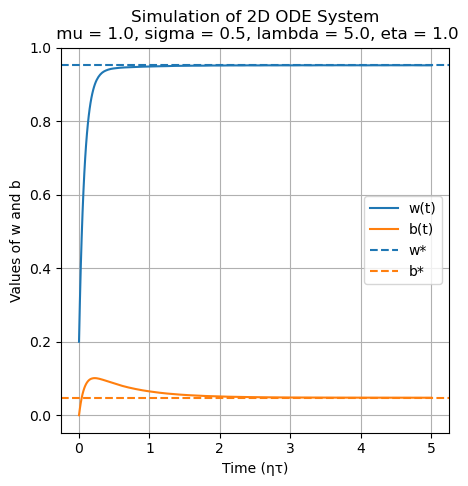

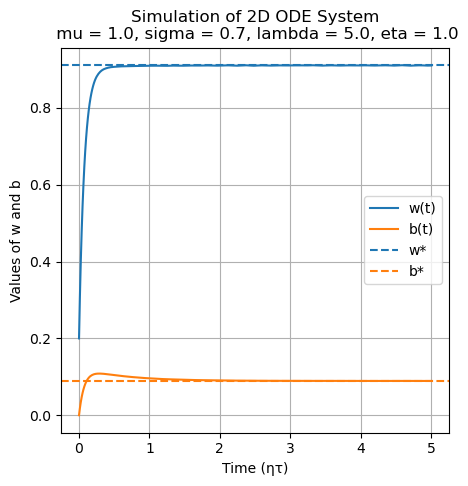

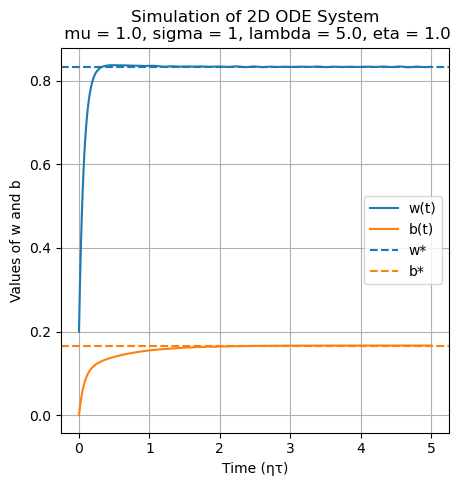

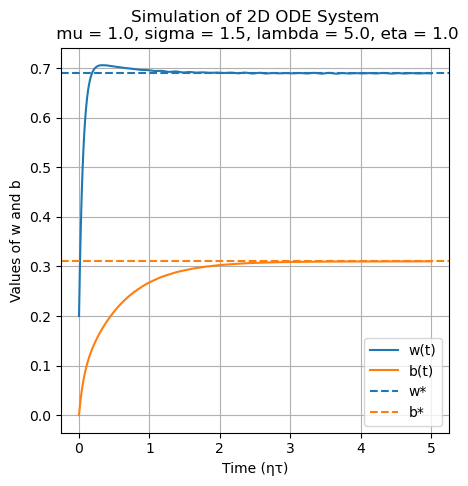

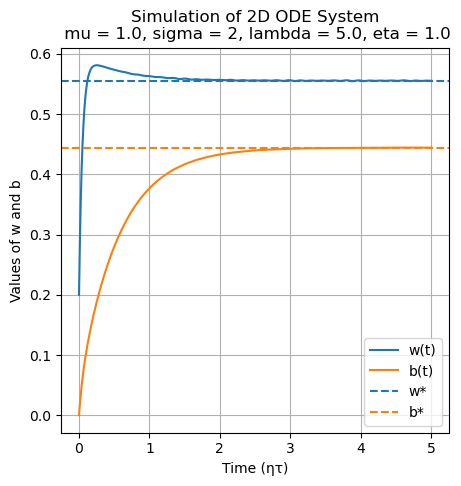

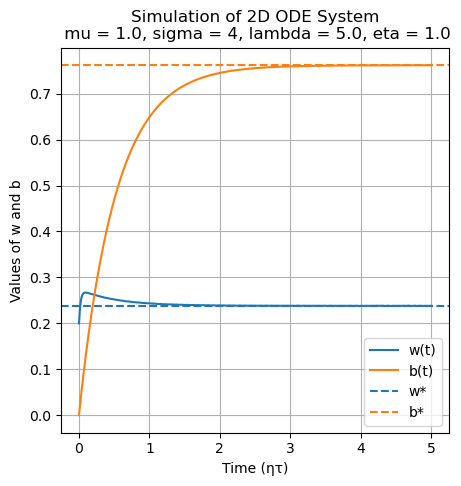

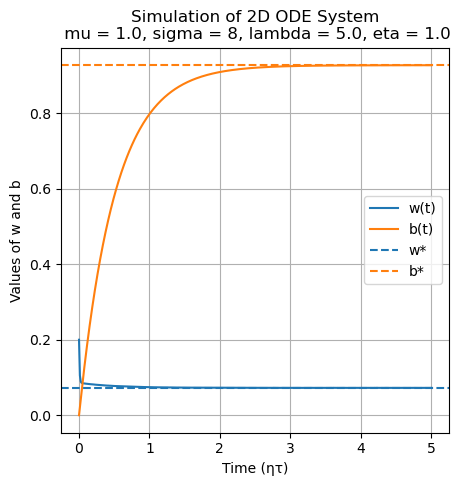

In [5]:
simulate_ode(mu = 1.0, sigma = 0.01, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.1, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.5, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.7, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 1, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 1.5, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 2, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 4, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 8, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])

### Vector field plot 

In [ ]:
def simulate_ode(mu, sigma, lambda_, eta, y0, t_span=(0, 5), pnts=400, logscale=False, figsize=(5, 5)):
    # Define the ODE system
    def ode_system(t, y):
        w, b = y
        A = np.array([[mu**2 + sigma**2 + lambda_, mu],
                      [mu, 1]])
        B = np.array([lambda_ + mu**2, mu])
        dydt = -2 * eta * (A @ np.array([w, b]) - B)
        return dydt
    t_eval = np.linspace(t_span[0], t_span[1], pnts)
    # Solve the ODE system
    sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)
    w_star = lambda_ / (lambda_ + sigma**2)
    b_star = (1 - w_star) * mu
    # Plot the results
    fig = plt.figure(figsize=figsize)
    plt.plot(sol.t, sol.y[0], label='w(t)')
    plt.plot(sol.t, sol.y[1], label='b(t)')
    plt.axhline(y=w_star, color='C0', linestyle='--', label='w*')
    plt.axhline(y=b_star, color='C1', linestyle='--', label='b*')
    if logscale:
        plt.xscale('log')
    plt.xlabel('Time (ητ)')
    plt.ylabel('Values of w and b')
    plt.title('Simulation of 2D ODE System\n mu = {}, sigma = {}, lambda = {}, eta = {}'.format(mu, sigma, lambda_, eta))
    plt.legend()
    plt.grid(True)
    plt.show()
    return fig, sol

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def simulate_ode_phase(mu, sigma, lambda_, eta, y0,
                       t_span=(0, 5),
                       pnts=400,
                       grid_size=20,
                       w_lim=None,
                       b_lim=None,
                       figsize=(6, 6)):
    """
    Simulates and plots the phase diagram for the 2D ODE system:
    
       d/dt [w, b] = -2 * eta * (A @ [w, b] - B),
       
    where
       A = [[mu^2 + sigma^2 + lambda_,   mu],
            [             mu,           1]]
       B = [lambda_ + mu^2, mu]
       
    Parameters
    ----------
    mu : float
    sigma : float
    lambda_ : float
    eta : float
        Learning rate or scaling factor in the ODE.
    y0 : array_like, shape(2,)
        Initial condition [w(0), b(0)].
    t_span : tuple (default: (0, 5))
        The time interval to simulate over.
    pnts : int (default: 400)
        Number of time points for the numerical solution.
    grid_size : int (default: 20)
        Number of points in each dimension (w, b) for plotting the vector field.
    w_lim : tuple (default: None)
        (w_min, w_max) for the phase diagram. If None, a range is chosen automatically.
    b_lim : tuple (default: None)
        (b_min, b_max) for the phase diagram. If None, a range is chosen automatically.
    figsize : tuple (default: (6, 6))
        Figure size for the plot.
        
    Returns
    -------
    fig : matplotlib Figure
    ax : matplotlib Axes
    sol : ODE solution (scipy.integrate.OdeResult)
    """
    
    # -- 1. Define the ODE system --
    def ode_system(t, y):
        w, b = y
        A = np.array([[mu**2 + sigma**2 + lambda_, mu],
                      [mu,                         1 ]])
        B = np.array([lambda_ + mu**2, mu])
        
        dydt = -2 * eta * (A @ np.array([w, b]) - B)
        return dydt
    
    # -- 2. Solve the ODE with solve_ivp for the given initial condition --
    t_eval = np.linspace(t_span[0], t_span[1], pnts)
    sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)
    
    # -- 3. Compute the analytical fixed point (equilibrium) --
    # From your original code, these lines give the equilibrium:
    w_star = lambda_ / (lambda_ + sigma**2)
    b_star = (1 - w_star) * mu
    
    # If you have a direct derivation for the fixed point, feel free to replace these lines accordingly.
    # We'll keep them as given:
    #
    # w_star = λ / (λ + σ²)
    # b_star = (1 - w_star)* μ
    
    # -- 4. Set up the ranges for w and b to plot the vector field --
    # If user didn't specify limits, choose them around the solution and the fixed point
    if w_lim is None:
        w_min = min(np.min(sol.y[0]), w_star) - 0.2
        w_max = max(np.max(sol.y[0]), w_star) + 0.2
    else:
        w_min, w_max = w_lim
    
    if b_lim is None:
        b_min = min(np.min(sol.y[1]), b_star) - 0.2
        b_max = max(np.max(sol.y[1]), b_star) + 0.2
    else:
        b_min, b_max = b_lim
    
    # Create a meshgrid in the (w, b) plane
    w_vals = np.linspace(w_min, w_max, grid_size)
    b_vals = np.linspace(b_min, b_max, grid_size)
    W, B = np.meshgrid(w_vals, b_vals)
    
    # -- 5. Compute the vector field (dw/dt, db/dt) at each point on the grid --
    U = np.zeros_like(W)
    V = np.zeros_like(B)
    
    for i in range(grid_size):
        for j in range(grid_size):
            w_ = W[i, j]
            b_ = B[i, j]
            # Evaluate the ODE at this point (time 't' can be 0 since the ODE is autonomous)
            dydt_ = ode_system(0, [w_, b_])
            U[i, j] = dydt_[0]
            V[i, j] = dydt_[1]
    
    # -- 6. Plot the phase portrait using quiver or streamplot --
    fig, ax = plt.subplots(figsize=figsize)
    
    # Option A: quiver plot (arrows)
    ax.quiver(W, B, U, V, color='blue', alpha=0.7, scale_units='xy', angles='xy')
    
    # Option B: streamplot (comment out quiver and uncomment these lines):
    # strm = ax.streamplot(W, B, U, V, color='gray', density=1.2)
    
    # -- 7. Plot a single trajectory from the initial condition y0 --
    ax.plot(sol.y[0], sol.y[1], 'k-', label='Trajectory from y0')
    ax.plot(sol.y[0][0], sol.y[1][0], 'kx', label='Start')  # mark the start
    # -- 8. Mark the fixed point --
    ax.plot(w_star, b_star, 'r*', label='Fixed point')
    
    # -- 9. Finalize the plot --
    ax.set_xlim(w_min, w_max)
    ax.set_ylim(b_min, b_max)
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_title(f'Phase Diagram\nmu={mu}, sigma={sigma}, lambda={lambda_}, eta={eta}')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()
    
    return fig, ax, sol

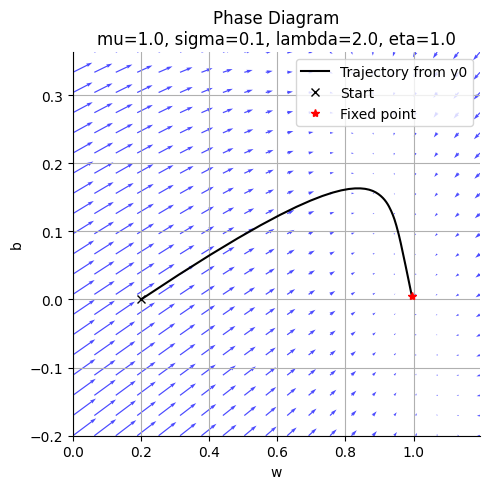

In [47]:
simulate_ode_phase(mu=1.0, sigma=0.1, lambda_=2.0, eta=1.0, y0=[0.2, 0], t_span=[0, 10], grid_size=20, figsize=(5, 5));

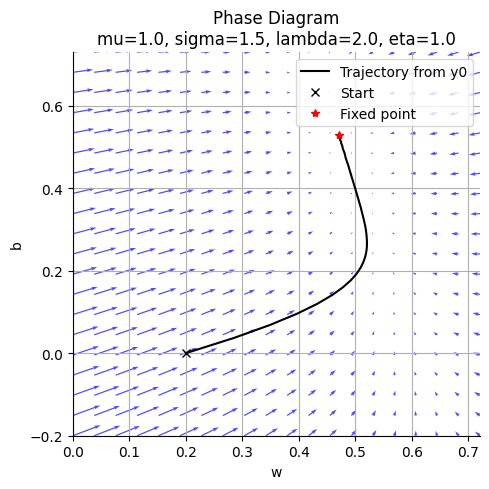

In [34]:
simulate_ode_phase(mu=1.0, sigma=1.5, lambda_=2.0, eta=1.0, y0=[0.2, 0], t_span=[0, 10], grid_size=20, figsize=(5, 5));

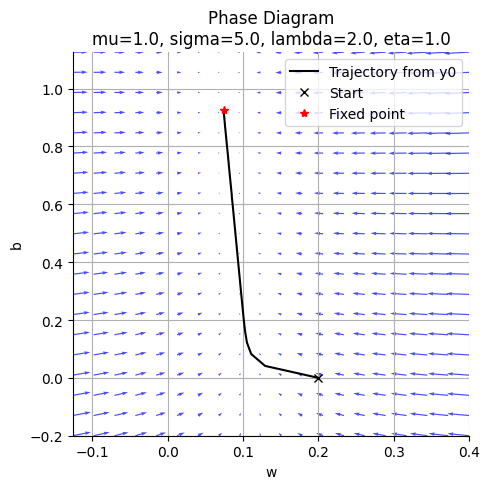

In [35]:
simulate_ode_phase(mu=1.0, sigma=5.0, lambda_=2.0, eta=1.0, y0=[0.2, 0], t_span=[0, 10], grid_size=20, figsize=(5, 5));

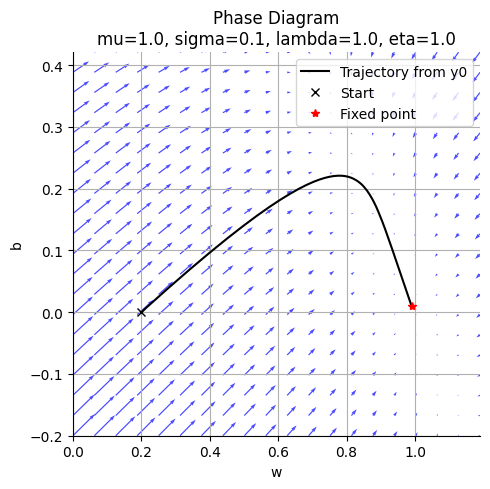

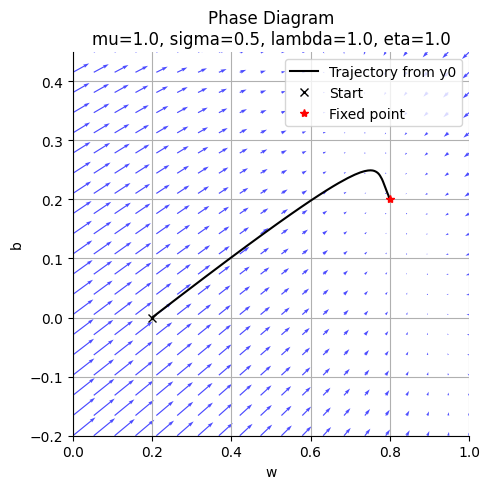

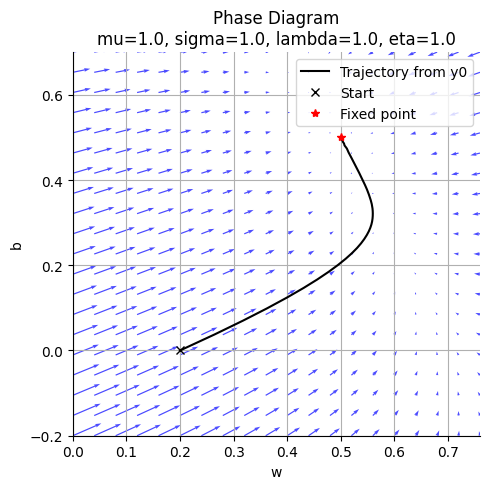

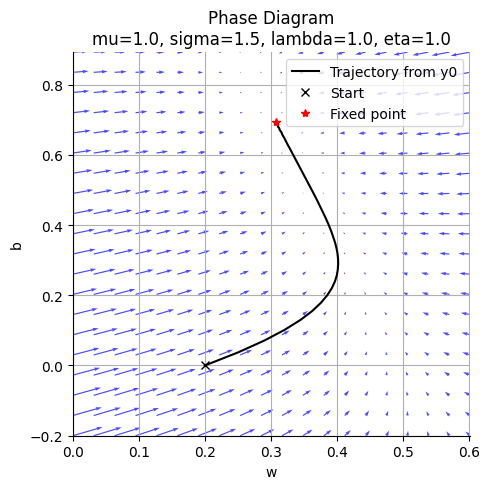

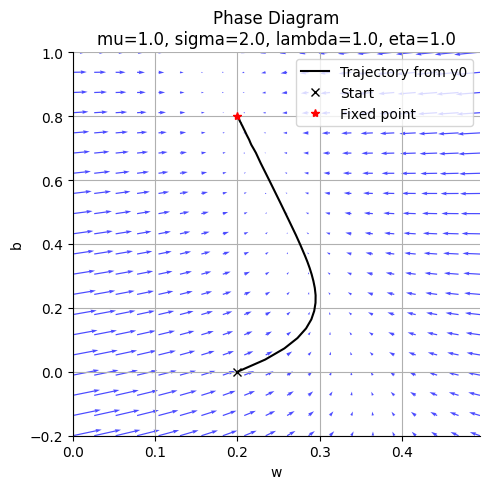

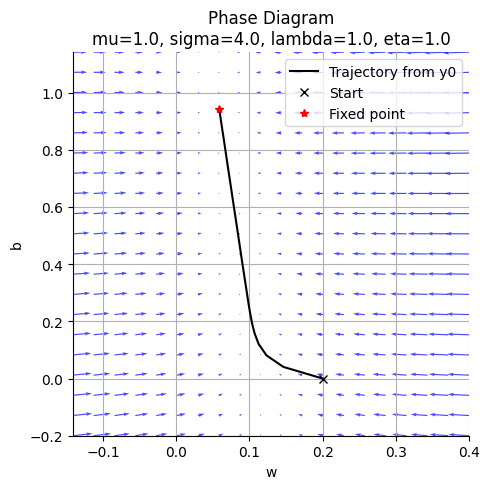

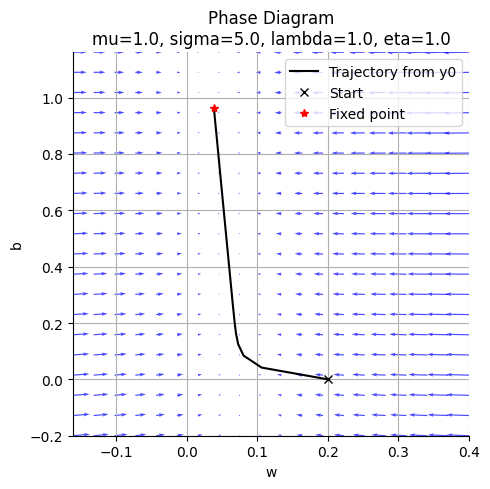

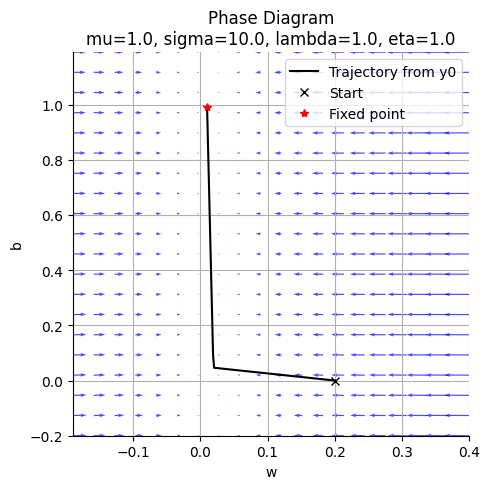

In [52]:
lambda_ = 1.0
for sigma in [0.1, 0.5, 1.0, 1.5, 2.0, 4.0, 5.0, 10.0]:
    fig, ax, sol = simulate_ode_phase(mu=1.0, sigma=sigma, lambda_=lambda_, eta=1.0, y0=[0.2, 0], t_span=[0, 10], grid_size=20, figsize=(5, 5));
    saveallforms(figdir, f"mean_cov_interaction_phase_diagram_lambda{lambda_}_sigma{sigma}", fig)

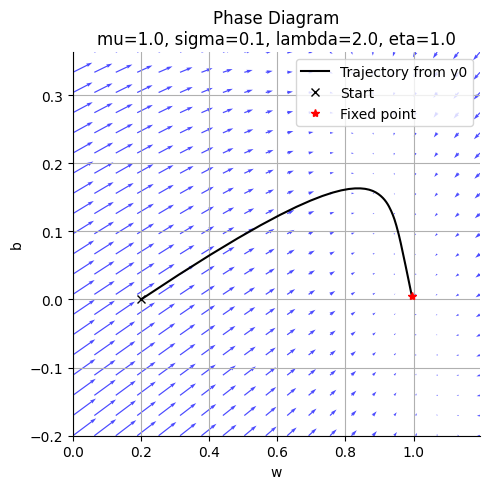

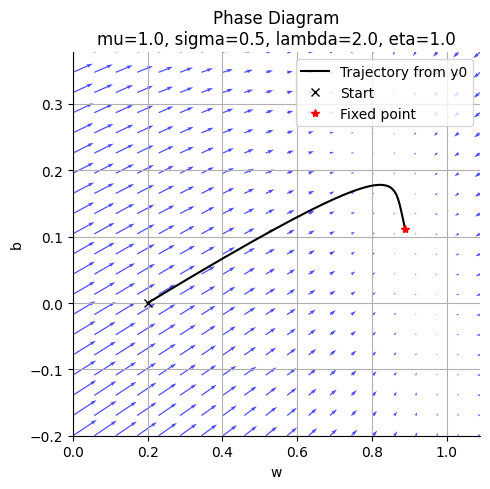

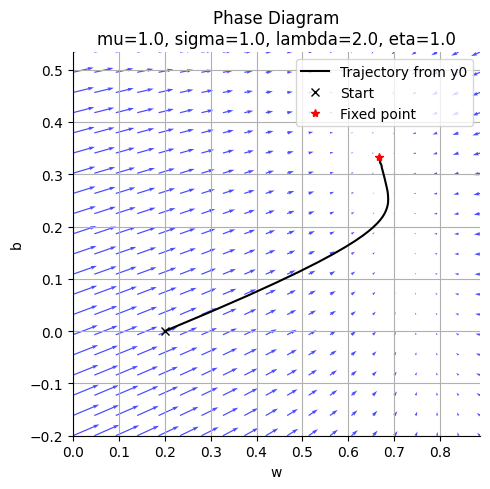

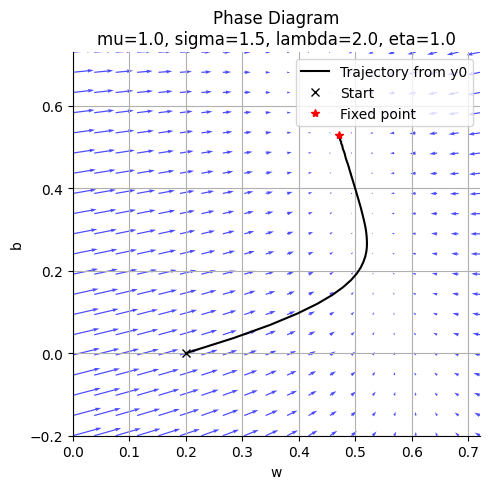

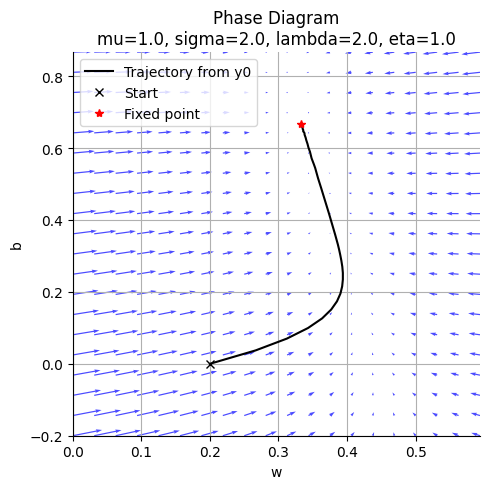

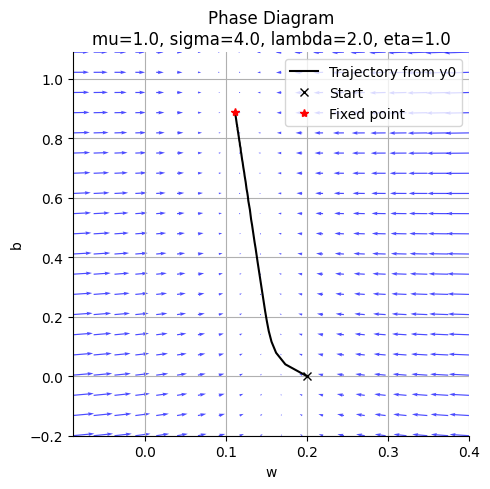

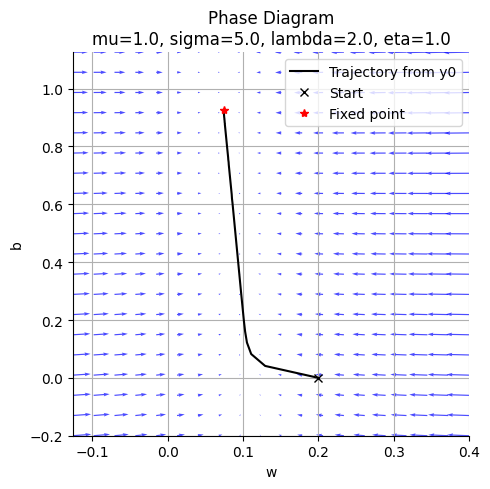

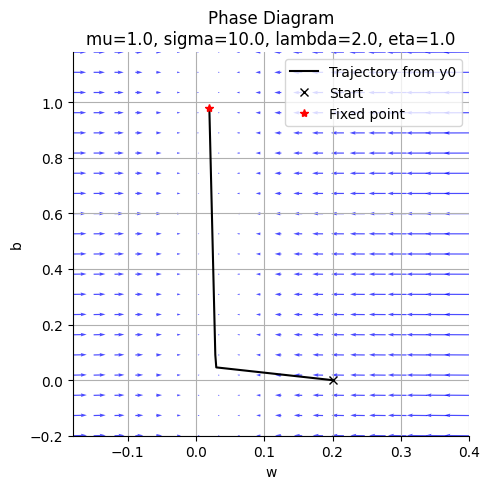

In [51]:
lambda_ = 2.0
for sigma in [0.1, 0.5, 1.0, 1.5, 2.0, 4.0, 5.0,10.0]:
    fig, ax, sol = simulate_ode_phase(mu=1.0, sigma=sigma, lambda_=lambda_, eta=1.0, y0=[0.2, 0], t_span=[0, 10], grid_size=20, figsize=(5, 5));
    saveallforms(figdir, f"mean_cov_interaction_phase_diagram_lambda{lambda_}_sigma{sigma}", fig)

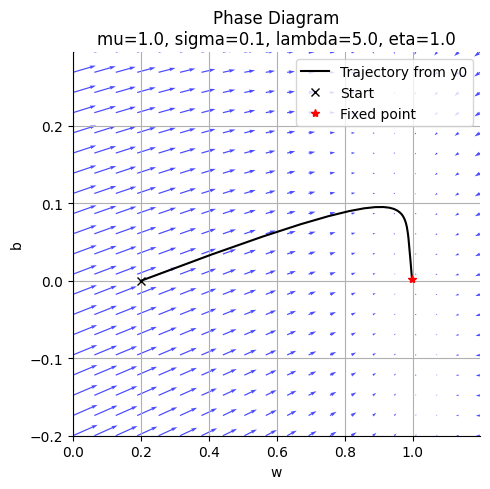

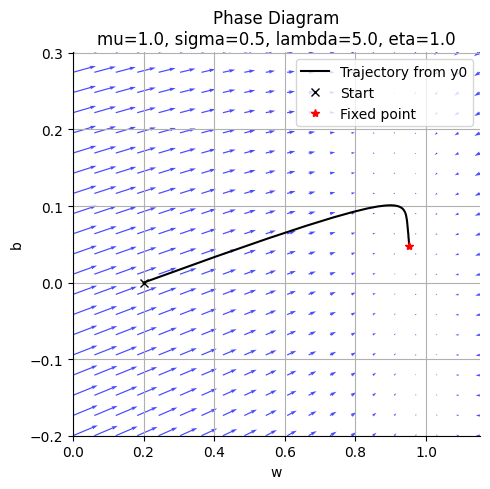

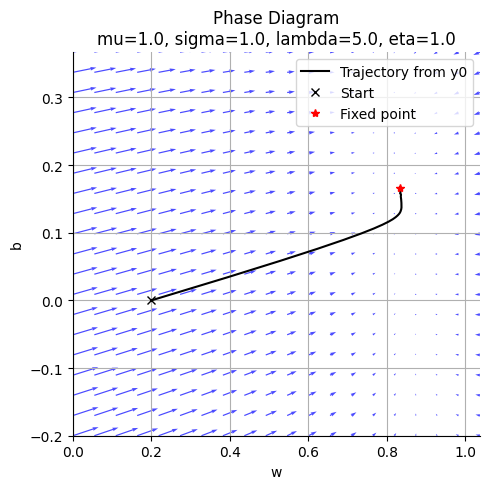

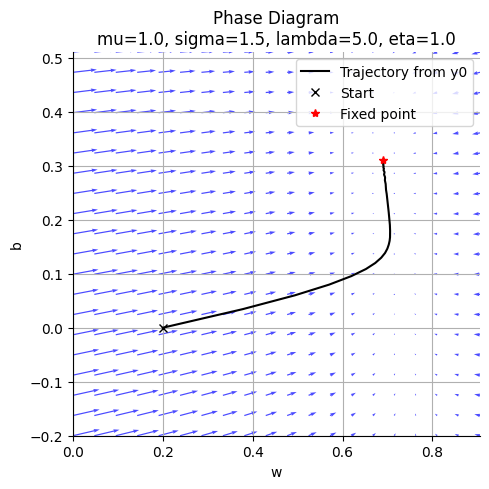

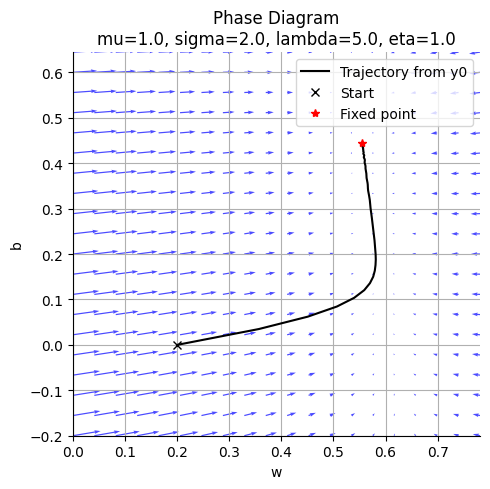

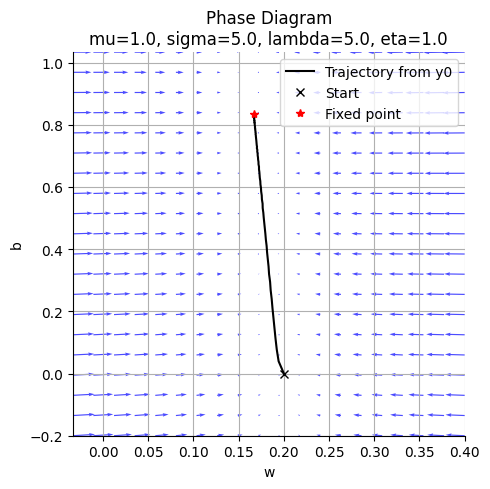

In [50]:
lambda_ = 5.0
for sigma in [0.1, 0.5, 1.0, 1.5, 2.0, 5.0]:
    fig, ax, sol = simulate_ode_phase(mu=1.0, sigma=sigma, lambda_=lambda_, eta=1.0, y0=[0.2, 0], t_span=[0, 10], grid_size=20, figsize=(5, 5));
    saveallforms(figdir, f"mean_cov_interaction_phase_diagram_lambda{lambda_}_sigma{sigma}", fig)

### Multi dimensional case

In [ ]:
import numpy as np

def generate_Q_matrix(sigma2, lambdas, c):
    n = len(lambdas) + 1  # The size of the matrix is determined by the length of lambdas
    Q = np.zeros((n, n))  # Initialize an n x n matrix with zeros

    # Fill the diagonal elements
    for i in range(n-1):
        Q[i, i] = sigma2 + lambdas[i] + c[i]**2
    
    # Fill the last diagonal element
    Q[n-1, n-1] = 1
    
    # Fill the off-diagonal elements
    for i in range(n-1):
        for j in range(i+1, n-1):
            Q[i, j] = Q[j, i] = c[i] * c[j]
    
    # Fill the last row and column
    for i in range(n-1):
        Q[i, n-1] = Q[n-1, i] = c[i]

    return Q

# Example usage
sigma2 = 1.0
lambdas = [0.5, 0.6, 0.7]
c = [1.0, 2.0, 3.0]

Q = generate_Q_matrix(sigma2, lambdas, c)
print(Q)